Name: Sowmya T
Assignment 1 - Neural Networks
Date: 09/22/2024

##importing the dataset IMDB and required packages

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
num_words = 10000  
maxlen = 500


##splitting the data into training and testing

In [35]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
maxlen = 500
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = sequence.pad_sequences(test_data, maxlen=maxlen)

##building the base neural network with two hidden layers

In [48]:
def build_baseline_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

baseline_model = build_baseline_model()
baseline_history = baseline_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)



Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5094 - loss: 0.6932 - val_accuracy: 0.5258 - val_loss: 0.6928
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.5367 - loss: 0.6909 - val_accuracy: 0.5156 - val_loss: 0.6883
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.6111 - loss: 0.6630 - val_accuracy: 0.7208 - val_loss: 0.5721
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7400 - loss: 0.5496 - val_accuracy: 0.7950 - val_loss: 0.4556
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.8081 - loss: 0.4347 - val_accuracy: 0.8084 - val_loss: 0.5388


##base model with one and three hidden layers

In [37]:
def build_one_layer_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

one_layer_model = build_one_layer_model()
one_layer_history = one_layer_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5027 - loss: 0.6933 - val_accuracy: 0.5018 - val_loss: 0.6948
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5388 - loss: 0.6881 - val_accuracy: 0.5598 - val_loss: 0.6718
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.6913 - loss: 0.6220 - val_accuracy: 0.7120 - val_loss: 0.5498
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7726 - loss: 0.4897 - val_accuracy: 0.8106 - val_loss: 0.4271
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.8300 - loss: 0.3935 - val_accuracy: 0.7184 - val_loss: 0.5772


In [38]:
def build_three_layers_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

three_layer_model = build_three_layers_model()
three_layer_history = three_layer_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4956 - loss: 0.6932 - val_accuracy: 0.5036 - val_loss: 0.6932
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.5132 - loss: 0.6928 - val_accuracy: 0.5038 - val_loss: 0.6928
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5373 - loss: 0.6907 - val_accuracy: 0.5134 - val_loss: 0.6978
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5979 - loss: 0.6765 - val_accuracy: 0.6418 - val_loss: 0.6279
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - accuracy: 0.7184 - loss: 0.5785 - val_accuracy: 0.7082 - val_loss: 0.5461


##Adjusting the hidden units

In [39]:
def build_32_units_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model_32_units = build_32_units_model()
history_32_units = model_32_units.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - accuracy: 0.5103 - loss: 0.6933 - val_accuracy: 0.5256 - val_loss: 0.6910
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.5682 - loss: 0.6833 - val_accuracy: 0.5930 - val_loss: 0.6547
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6993 - loss: 0.5994 - val_accuracy: 0.7884 - val_loss: 0.4925
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - accuracy: 0.7568 - loss: 0.5121 - val_accuracy: 0.8066 - val_loss: 0.4264
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.8234 - loss: 0.3996 - val_accuracy: 0.8320 - val_loss: 0.3789


In [40]:
def build_64_units_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model_64_units = build_64_units_model()
history_64_units = model_64_units.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.5060 - loss: 0.6929 - val_accuracy: 0.5462 - val_loss: 0.6919
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.5771 - loss: 0.6794 - val_accuracy: 0.6638 - val_loss: 0.6305
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - accuracy: 0.6966 - loss: 0.5881 - val_accuracy: 0.7916 - val_loss: 0.4525
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.7903 - loss: 0.4615 - val_accuracy: 0.7518 - val_loss: 0.5416
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.8270 - loss: 0.3834 - val_accuracy: 0.8204 - val_loss: 0.3959


##Changing loss function to "mse"

In [41]:
def build_mse_loss_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='mse',
                  metrics=['accuracy'])
    return model

mse_loss_model = build_mse_loss_model()
mse_loss_history = mse_loss_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.5040 - loss: 0.2500 - val_accuracy: 0.4962 - val_loss: 0.2500
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - accuracy: 0.5242 - loss: 0.2496 - val_accuracy: 0.4940 - val_loss: 0.2503
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.5376 - loss: 0.2477 - val_accuracy: 0.4970 - val_loss: 0.2516
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.6334 - loss: 0.2318 - val_accuracy: 0.6852 - val_loss: 0.2063
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7350 - loss: 0.1879 - val_accuracy: 0.6522 - val_loss: 0.2136


##modifying the model with "tanh" activation function

#i)model with dropout function

In [42]:
def build_dropout_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

dropout_model = build_dropout_model()
dropout_history = dropout_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5053 - loss: 0.6934 - val_accuracy: 0.4960 - val_loss: 0.6932
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.5214 - loss: 0.6922 - val_accuracy: 0.5284 - val_loss: 0.6921
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5497 - loss: 0.6885 - val_accuracy: 0.6584 - val_loss: 0.6709
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6492 - loss: 0.6540 - val_accuracy: 0.7764 - val_loss: 0.5583
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.7490 - loss: 0.5573 - val_accuracy: 0.7526 - val_loss: 0.5163


#ii) model with "tanh" activation function

In [43]:
def build_tanh_activation_model():
    model = models.Sequential()
    model.add(layers.Embedding(10000, 16, input_length=maxlen))
    model.add(layers.Flatten())
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(16, activation='tanh'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tanh_model = build_tanh_activation_model()
tanh_history = tanh_model.fit(train_data, train_labels, epochs=5, batch_size=512, validation_split=0.2)


Epoch 1/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.5244 - loss: 0.7395 - val_accuracy: 0.5544 - val_loss: 0.6694
Epoch 2/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.7127 - loss: 0.5998 - val_accuracy: 0.7698 - val_loss: 0.4910
Epoch 3/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.8205 - loss: 0.4325 - val_accuracy: 0.8142 - val_loss: 0.4090
Epoch 4/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.8544 - loss: 0.3519 - val_accuracy: 0.8238 - val_loss: 0.3976
Epoch 5/5
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8919 - loss: 0.2805 - val_accuracy: 0.7788 - val_loss: 0.4792


##evaluating the models

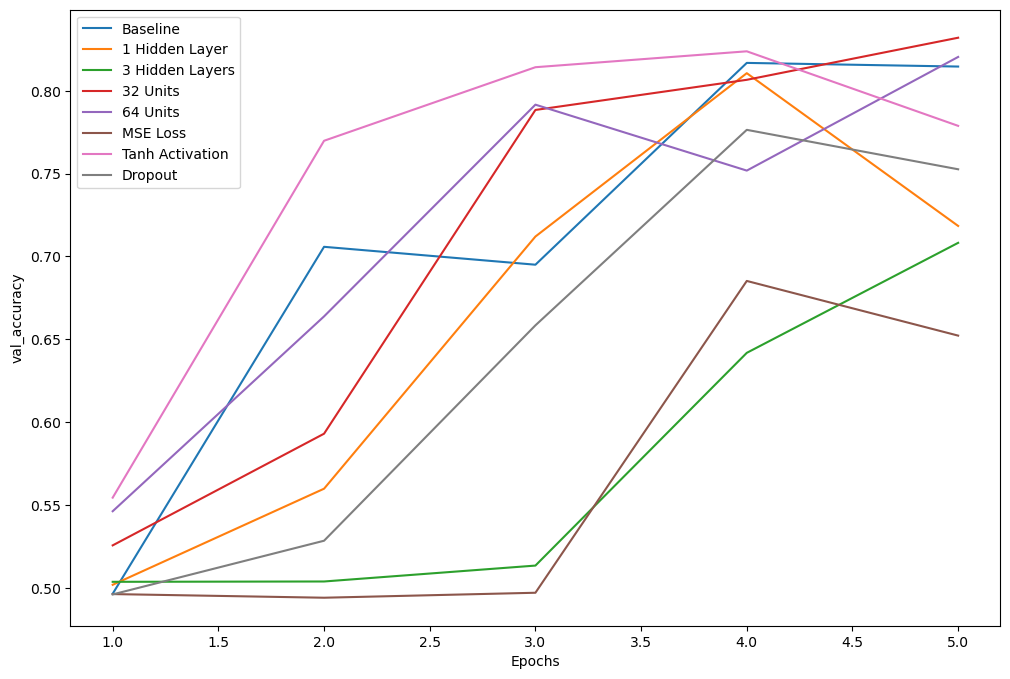

In [44]:
def plot_history(histories, key='val_accuracy'):
    plt.figure(figsize=(12,8))
    
    for name, history in histories:
        val = history.history[key]
        plt.plot(range(1, len(val) + 1), val, label=name)
    
    plt.xlabel('Epochs')
    plt.ylabel(key)
    plt.legend()
    plt.show()

histories = [
    ('Baseline', baseline_history),
    ('1 Hidden Layer', one_layer_history),
    ('3 Hidden Layers', three_layer_history),
    ('32 Units', history_32_units),
    ('64 Units', history_64_units),
    ('MSE Loss', mse_loss_history),
    ('Tanh Activation', tanh_history),
    ('Dropout', dropout_history)
]

plot_history(histories)


In [51]:

def evaluate_model(model, test_data, test_labels):
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    return test_loss, test_accuracy

baseline_test_loss, baseline_test_accuracy = evaluate_model(baseline_model, test_data, test_labels)
one_layer_test_loss, one_layer_test_accuracy = evaluate_model(one_layer_model, test_data, test_labels)
three_layer_test_loss, three_layer_test_accuracy = evaluate_model(three_layer_model, test_data, test_labels)
tanh_test_loss, tanh_test_accuracy = evaluate_model(tanh_model, test_data, test_labels)
dropout_test_loss, dropout_test_accuracy = evaluate_model(dropout_model, test_data, test_labels)

print("### Test Results ###")
print(f"Baseline Model - Loss: {baseline_test_loss:.4f}, Accuracy: {baseline_test_accuracy:.4f}")
print(f"One Hidden Layer Model - Loss: {one_layer_test_loss:.4f}, Accuracy: {one_layer_test_accuracy:.4f}")
print(f"Three Hidden Layers Model - Loss: {three_layer_test_loss:.4f}, Accuracy: {three_layer_test_accuracy:.4f}")
print(f"Tanh Activation Model - Loss: {tanh_test_loss:.4f}, Accuracy: {tanh_test_accuracy:.4f}")
print(f"Dropout Model - Loss: {dropout_test_loss:.4f}, Accuracy: {dropout_test_accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8107 - loss: 0.5371
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7273 - loss: 0.5612
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7153 - loss: 0.5393
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7772 - loss: 0.4843
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7542 - loss: 0.5155
### Test Results ###
Baseline Model - Loss: 0.5371, Accuracy: 0.8115
One Hidden Layer Model - Loss: 0.5697, Accuracy: 0.7200
Three Hidden Layers Model - Loss: 0.5456, Accuracy: 0.7090
Tanh Activation Model - Loss: 0.4754, Accuracy: 0.7813
Dropout Model - Loss: 0.5184, Accuracy: 0.7512


###The baseline model offers the best balance of accuracy and loss among all the models.
The one hidden layer and three hidden layers models both underperformed, with potential issues of underfitting and overfitting respectively.
The tanh activation model showed competitive performance, making it a viable option in certain cases.
Dropout provides a balanced trade-off between accuracy and model generalization, slightly improving loss but reducing accuracy compared to the baseline.





